# Нахождение границ объектов
В данной работе демонстрируются способы нахождения границ объектов путем применения фильтров и пороговых функций.  
Для начала импортируем все необходимые нам библиотеки.

In [1]:
import numpy as np
%matplotlib inline
import reader
import grapher

Далее загрузим изначальное изображение.

(300, 400)


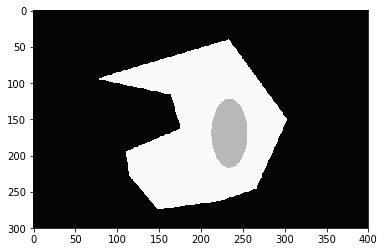

In [2]:
col_num, row_num, depth, image_data = reader.jpg_reader("data/MODEL.jpg", channels=1)
print(image_data.shape)
grapher.set_image(image_data, cmap="gray")
grapher.show()

Далее нам понадобится пороговая функция - функция, преобразующая значения либо в 0, либо в 1 относительно некоей границы.

In [3]:
def step_function(image_data: np.ndarray, step_lower: int = 128, step_higher: int = 128, depth: int = 8) -> np.ndarray:
	ans: np.ndarray = np.copy(image_data).astype(image_data.dtype)
	def step_f(x):
		if x < step_lower:
			x = 0
		elif x >= step_higher:
			x = (1 << depth) - 1
		return x
	step_f = np.vectorize(step_f)
	ans = step_f(ans)
	return ans.astype(image_data.dtype)


	

Применим пороговую функцию для получения абсолютно черно-белого изображения.

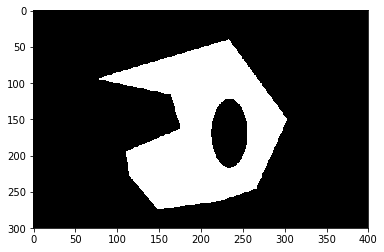

In [4]:
image_data2 = step_function(image_data, step_lower=200, step_higher=200)
grapher.set_image(image_data2, cmap="gray")
grapher.show()

Далее к изображению применим Low-pass фильтр. Итогом станет размывание границ изображения.

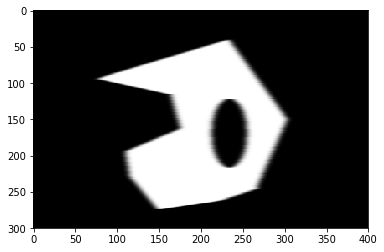

In [5]:
from analysis.preprocessing import LPF
from analysis import impulse_response

m = 16
lpfilter = LPF(Fcut=0.05, dT=1, m=m)
image_data3 = np.empty_like(image_data2)
for i in range(len(image_data2)):
	new_row = impulse_response.process(image_data2[i, :], lpfilter)
	image_data3[i, :] = new_row[m:-m-1]

grapher.set_image(image_data3, cmap="gray")
grapher.show()

Соответственно, после этого можно вычесть из изначального изображения получившееся и получить размазанные границы объектов.

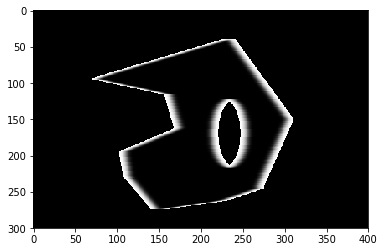

In [6]:
image_data4 = image_data2 - image_data3
grapher.set_image(image_data4, cmap="gray")
grapher.show()

Для получения более четких границ можно применить пороговую функцию с высоким порогом.

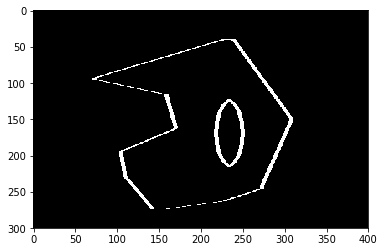

In [7]:
image_data5 = step_function(image_data4, step_lower=200, step_higher=200)
grapher.set_image(image_data5, cmap="gray")
grapher.show()

Далее покажем, что при наличии тусклых (не черно-белых объектов), определение их границ более затруднено. Примением пороговую функцию так, чтобы круг в центре остался серым.

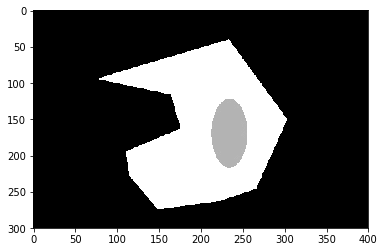

In [8]:
image_data2 = step_function(image_data, step_lower=128, step_higher=200)
grapher.set_image(image_data2, cmap="gray")
grapher.show()

Далее точно так же применим Low-pass фильтр.

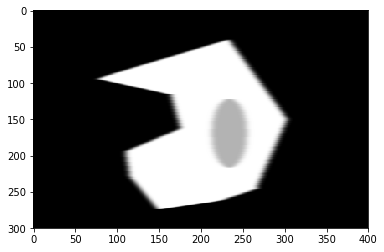

In [9]:
from analysis.preprocessing import LPF
from analysis import impulse_response

m = 16
lpfilter = LPF(Fcut=0.05, dT=1, m=m)
image_data3 = np.empty_like(image_data2)
for i in range(len(image_data2)):
	new_row = impulse_response.process(image_data2[i, :], lpfilter)
	image_data3[i, :] = new_row[m:-m-1]

grapher.set_image(image_data3, cmap="gray")
grapher.show()

И затем вычтем изображения. Можно заметить, что граница около внутреннего круга стала толще - это из-за большео размазывания данного элемента, вследствие чего точные границы определить сложнее.

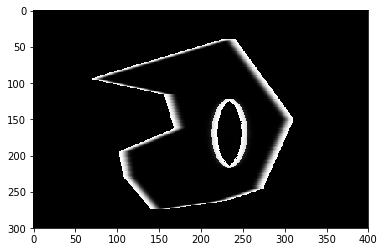

In [10]:
image_data4 = image_data2 - image_data3
grapher.set_image(image_data4, cmap="gray")
grapher.show()

Точно также можно применить High-pass фильтр и получить границы сразу же, без вычитания изображений

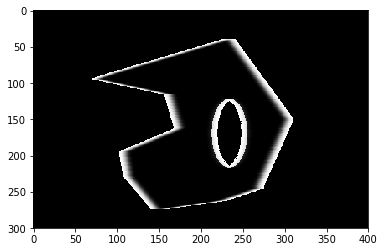

In [11]:
from analysis.preprocessing import HPF
from analysis import impulse_response

m = 16
lpfilter = HPF(Fcut=0.05, dT=1, m=m)
image_data3 = np.empty_like(image_data2)
for i in range(len(image_data2)):
	new_row = impulse_response.process(image_data2[i, :], lpfilter)
	image_data3[i, :] = new_row[m:-m-1]

grapher.set_image(image_data3, cmap="gray")
grapher.show()

Далее остается только применить пороговую функцию и получить точные границы объектов.

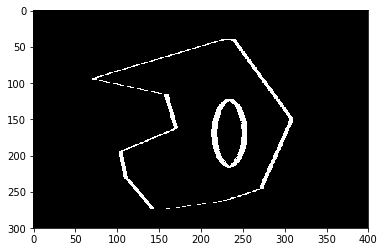

In [12]:
image_data5 = step_function(image_data3, step_lower=200, step_higher=200)
grapher.set_image(image_data5, cmap="gray")
grapher.show()